In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [67]:
import os

def cleanFilenames(directory):
    for filename in os.listdir(directory):
        filenameold = filename
        filename2 = "_".join(filename.replace(",", " ").replace(":", " ").split(" "))
        os.rename(directory+filenameold, directory+filename2)

In [123]:
import os
import datetime

def cleanContig(directory, filename, output = False):
    
    months = {'February': 2, 'January': 1}
    dateTime = filename.split("_")[6:]
    dateTime = [months[i] if i in months.keys() else i for i in dateTime ]
    date = dateTime[0]+'-'+str(dateTime[1])+'-'+'2019'
    time = dateTime[3]+':'+dateTime[4]
    tag = pd.to_datetime(date + ' ' + time).strftime("%d_%m_%H_%M")
    df = pd.read_csv(directory+filename, header=None)
    
    df = df[0].str.split("_", n=10, expand = True) 
    if output:
        print(filename)
        print(tag)
    df = df.drop([0,1,5,8], axis=1)
    new = df[10].str.split("\t", n=2, expand = True)
    df[10]=new[0]
    df['distance'] = new[1]
    df = df.replace(months)
    #print(df.head())
    df['date'] = df[6].astype('str')+'-'+df[7].astype('str')+'-'+'2019'
    df['time'] = df[9].astype('str')+':'+df[10].astype('str')
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst = True)
    df = df.drop([6,7,9,10, 'date', 'time'], axis=1)
    df = df.rename(index=str, columns={2:'WorkshopEd', 3:'Username', 4:'MacroRev'})
    df['distance'] = pd.to_numeric(df['distance'])
    df = df.sort_values(by='datetime').reset_index(drop=True)
    df['Edit']=df.index
    df = df.set_index('datetime')
    df['Edit_norm'] = (df['Edit']-df['Edit'].min())/(df['Edit'].max()-df['Edit'].min())
    df.to_csv(directory+'../CleanContigs/Contig'+tag+'.csv')
    return tag, df

In [6]:
matrix = pd.DataFrame()
matrix['2019-01-30 17:54:00']= contigs['2019-01-30 17:54:00']['distance']
for key, distance in contigs.items():
    matrix[key] = distance['distance']
matrix = matrix.reindex(sorted(matrix.columns), axis=1)
matrix = matrix.sort_index()
matrix

,2019-01-30 09:39:00,2019-01-30 09:40:00,2019-01-30 09:42:00,2019-01-30 09:43:00,2019-01-30 09:44:00,2019-01-30 09:45:00,2019-01-30 09:46:00,2019-01-30 09:48:00,2019-01-30 09:49:00,2019-01-30 09:51:00,...,2019-01-31 14:47:00,2019-01-31 14:49:00,2019-01-31 14:50:00,2019-01-31 14:51:00,2019-01-31 14:52:00,2019-01-31 14:53:00,2019-01-31 14:54:00,2019-01-31 14:55:00,2019-01-31 15:35:00,2019-01-31 16:56:00
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-30 09:39:00,3.679348,0.602804,1.882175,2.035422,2.237245,2.457077,2.592191,2.840951,2.932056,3.074695,...,4.049940,4.046484,4.045903,4.046471,4.046840,4.046205,4.047777,4.045310,4.049974,4.049751
2019-01-30 09:40:00,0.125000,3.677570,1.480363,1.667575,1.908163,2.074246,2.227766,2.499086,2.599303,2.751524,...,3.949544,3.941075,3.939546,3.939137,3.940101,3.938683,3.940715,3.938117,3.949682,3.950249
2019-01-30 09:42:00,0.135870,0.056075,3.930514,0.384196,0.670918,0.974478,1.199566,1.648995,1.792683,2.042683,...,3.847253,3.840505,3.840637,3.841512,3.841372,3.841063,3.842371,3.842031,3.848703,3.849889
2019-01-30 09:43:00,0.130435,0.056075,0.075529,3.773842,0.336735,0.684455,0.932755,1.404022,1.555749,1.833841,...,3.776649,3.767755,3.767712,3.767990,3.769807,3.768456,3.770532,3.769217,3.777950,3.779207
2019-01-30 09:44:00,0.141304,0.056075,0.078550,0.106267,3.923469,0.387471,0.659436,1.122486,1.292683,1.592988,...,3.727570,3.717988,3.717998,3.718398,3.720529,3.720167,3.721534,3.716326,3.729177,3.730657
2019-01-30 09:45:00,0.141304,0.056075,0.111782,0.136240,0.102041,3.786543,0.342733,0.901280,1.069686,1.393293,...,3.664198,3.650423,3.650442,3.650251,3.650879,3.650686,3.652310,3.647743,3.666323,3.666495
2019-01-30 09:46:00,0.141304,0.056075,0.114804,0.138965,0.104592,0.083527,3.835141,0.670932,0.792683,1.157012,...,3.604271,3.591153,3.590681,3.588694,3.587846,3.587980,3.588143,3.586918,3.606560,3.606451
2019-01-30 09:48:00,0.146739,0.060748,0.120846,0.147139,0.109694,0.176334,0.164859,3.722121,0.214286,0.641768,...,3.512141,3.499741,3.495583,3.494018,3.493644,3.493313,3.494333,3.490303,3.513481,3.513810
2019-01-30 09:49:00,0.146739,0.060748,0.120846,0.147139,0.109694,0.178654,0.167028,0.071298,3.707317,0.629573,...,3.473222,3.463107,3.459726,3.457950,3.456208,3.456661,3.454228,3.449577,3.473983,3.474524


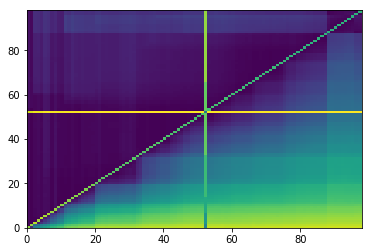

In [7]:
plt.pcolor(matrix)
plt.show()

In [129]:
import time

Data = []

for i, directory in enumerate(next(os.walk('./Data'))[1]):
    Data.append(dict())
    Data[i]['Name']= directory
    path = "./Data/"+directory+"/"
    print(path)
    cleanFilenames(path+"START/")
    os.system("mv -v "+path+"START .")
    os.system("./bcl3pezza")
    os.system("mv -v START "+path+"START")
    contigs = dict()
    if not os.path.exists(path+'START/CleanContigs'):
        os.makedirs(path+'START/CleanContigs')
    tag = list()
    filelist = [h for h in os.listdir(path+"START/ris_bcl+10000-10000/") if not os.path.isdir(h)]
    files = list()
    for j, filename in enumerate(filelist):
        #print(filename)
        tag_temp, df = cleanContig(path+"START/ris_bcl+10000-10000/", filename)
        tag.append(tag_temp)
        contigs[tag[j]] = df
        files.append(filename)
    filetimelist = zip(tag, files)
    lastDraft = sorted(filetimelist, key =lambda x: x[0])[-1]
    df = pd.read_csv(path+'START/CleanContigs/Contig'+lastDraft[0]+'.csv')
    Data[i]["Conv_df"] = df
    Data[i]["LastDraft"] = dict()
    os.system("rm ContigSlinding")
    os.system("bash runningWindow.sh "+path+"START/"+lastDraft[1][7:])
    time.sleep(10)
    Sliding = pd.read_csv("ContigSlinding", sep="\t", header=None)
    Sliding = Sliding.drop([0], axis=1)
    Data[i]["LastDraft"]["VarS"] = Sliding[1].var()
    Data[i]["LastDraft"]["MeanS"] = Sliding[1].mean()
    Data[i]["LastDraft"]["VarS'"] = np.var(np.diff(Sliding[1]))
    

./Data/COLLIAUX/
./Data/AOUAMEUR/
./Data/VALDANO/


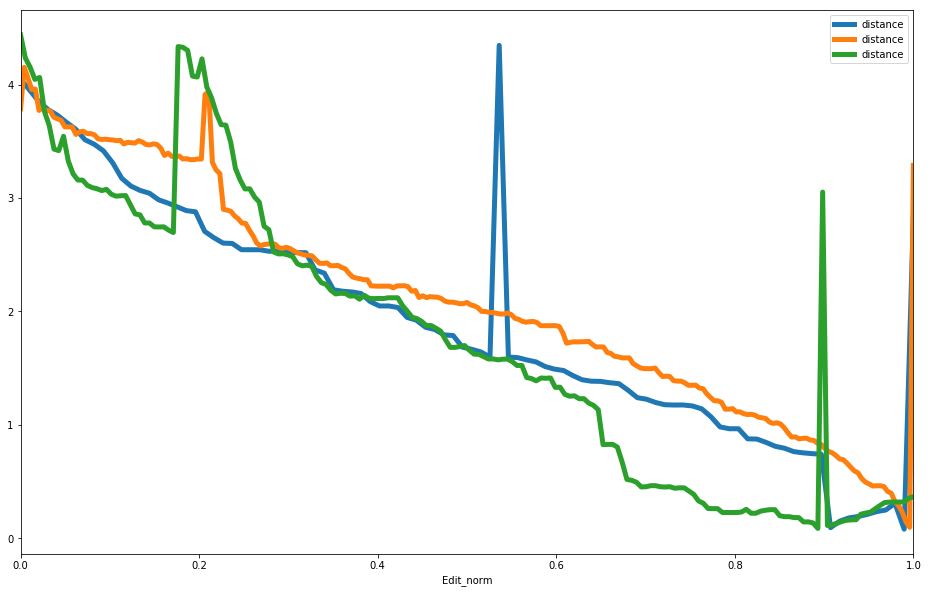

In [137]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
for i in range(len(Data)):
    Data[i]["Conv_df"].plot(ax=ax, x='Edit_norm', y='distance', figsize=(16, 10), linewidth=5)

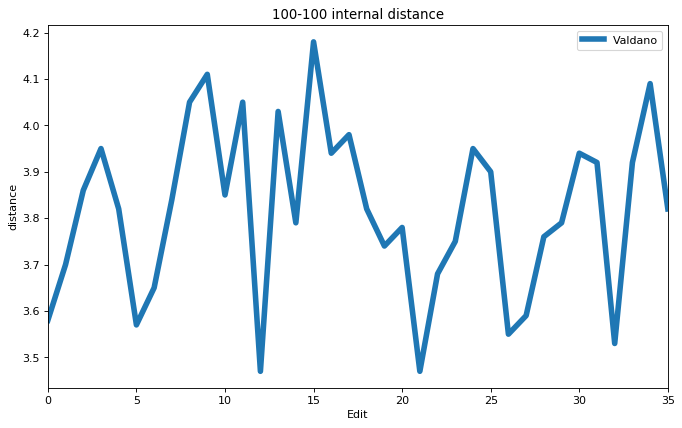

In [160]:
figure = plt.figure(figsize=(10,6), dpi=80)
ax = figure.add_subplot(111)
Sliding.plot(ax=ax,linewidth=5, label="100-100 internal distance")
plt.xlabel('Edit')
plt.ylabel('distance')
ax.legend(["Valdano"])
ax.set_title("100-100 internal distance")
plt.savefig("Jumpiness.jpg")